In [4]:
import pandas as pd
import numpy as np

In [5]:
letter_data = pd.read_csv("https://raw.githubusercontent.com/opencv/opencv/master/samples/data/letter-recognition.data",
                         names = ["class","x1",'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16'],
                         index_col=False)

In [67]:
letter_data.head()

,class,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
import sklearn 
from sklearn import tree
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

In [7]:
y= letter_data['class']
X = letter_data.drop('class',axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [9]:
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(),X=X_train, y=y_train, param_name="max_depth", param_range=range(1,50), cv=5)

In [10]:
train_scores_avg = train_scores.mean(axis=1)
valid_scores_avg = valid_scores.mean(axis=1)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

(0.0, 1)

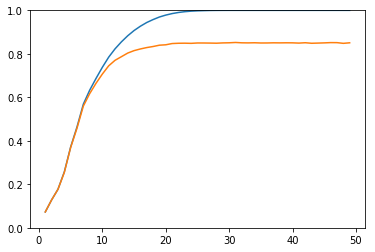

In [12]:
plt.plot(range(1,50),train_scores_avg, label="Training Accuracy")
plt.plot(range(1,50),valid_scores_avg, Label ="Cross Validation Accuracy")
plt.ylim(.0,1)

In [10]:
from sklearn.model_selection import GridSearchCV

In [14]:
GStree = GridSearchCV(estimator=tree.DecisionTreeClassifier(),cv=5, param_grid={"max_depth":range(1,50)})

In [8]:
import time

In [18]:
t0 = time.time()
GStree.fit(X_train, y_train)
print (time.time()-t0)

15.956427574157715


In [19]:
GStree.best_params_

{'max_depth': 48}

In [11]:
from sklearn.model_selection import learning_curve

In [55]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(tree.DecisionTreeClassifier(max_depth=10),X_train, y_train,train_sizes= np.linspace(.1,1,20), cv=5, shuffle=True)

In [56]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

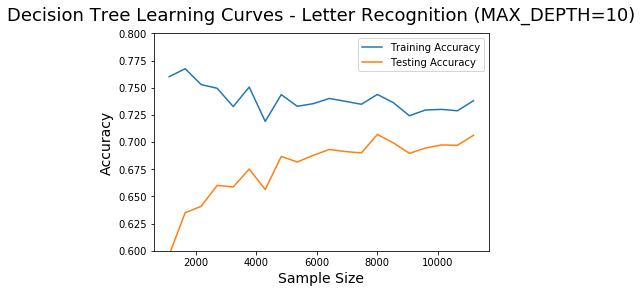

In [64]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('Decision Tree Learning Curves - Letter Recognition (MAX_DEPTH=10)', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,.8)

plt.savefig("Letters_DT_LC-2.png",bbox_inches="tight")

In [10]:
from sklearn import neighbors

In [9]:
train_scores, valid_scores = validation_curve(estimator=neighbors.KNeighborsClassifier(),X=X_train, y=y_train, param_name="n_neighbors", param_range=range(1,10,1), cv=5)

In [85]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

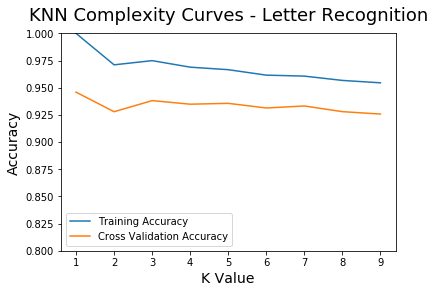

In [95]:
plt.plot(range(1,10,1),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,10,1),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('K Value', fontsize = 14)
plt.title('KNN Complexity Curves - Letter Recognition', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.8,1)

plt.savefig("Letters_KNN_LC.png",bbox_inches="tight")

In [10]:
GSknn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), cv=5, param_grid ={'n_neighbors':range(1,10)})

In [11]:
GSknn.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [12]:
GSknn.best_params_

{'n_neighbors': 1}

In [92]:
y_pred=GSknn.predict(X_test)

In [103]:
y_pred[0:10]

array(['V', 'O', 'A', 'Q', 'M', 'D', 'K', 'D', 'Q', 'I'], dtype=object)

In [104]:
y_test[0:10]

17551    V
18808    O
17171    A
5640     Q
10378    M
18254    D
3302     K
16946    D
19118    Q
16136    I
Name: class, dtype: object

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

NameError: name 'y_pred' is not defined

In [19]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, learn_train_scores, learn_test_scores = learning_curve(neighbors.KNeighborsClassifier(n_neighbors=10),X_train, y_train,train_sizes= np.linspace(.1,1,10),cv=5)

In [20]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

In [21]:
learn_train_mean

array([ 0.75120643,  0.83538874,  0.87602026,  0.90223414,  0.91679771,
        0.92679077,  0.93612459,  0.9420306 ,  0.94646545,  0.94992852])

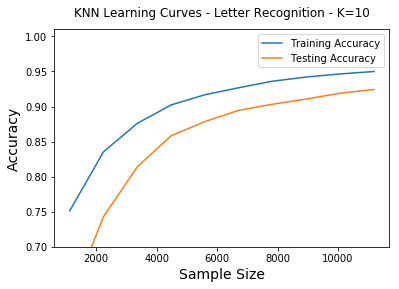

In [23]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('KNN Learning Curves - Letter Recognition - K=10', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.70,1.01)
plt.savefig("Letters_KNN_LC_k10.png")

In [14]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier

In [18]:
train_scores, valid_scores = validation_curve(estimator=MLPClassifier(max_iter=2000),X=X_train, y=y_train, param_name="hidden_layer_sizes", param_range=[(i,) for i in range(1,20)], cv=5)

TypeError: validation_curve() got an unexpected keyword argument 'shuffle'

In [14]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

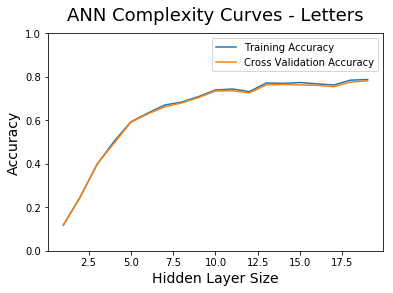

In [17]:
plt.plot(range(1,20),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,20),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Hidden Layer Size', fontsize = 14)
plt.title('ANN Complexity Curves - Letters', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1)

plt.savefig("Letters_ANN_VC1.png",bbox_inches="tight")

In [25]:
GSann = GridSearchCV(estimator=MLPClassifier(max_iter=2000), cv=5, param_grid ={'hidden_layer_sizes':[(i,) for i in range(1,20)],'activation' : 
                                                                                ('identity','logistic', 'tanh', 'relu'),'learning_rate' : ('constant', 'invscaling', 'adaptive')})

In [2]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
RSann = RandomizedSearchCV(estimator=MLPClassifier(max_iter=2000), cv=5, param_distributions ={'hidden_layer_sizes':[(i,) for i in range(1,20)],'activation' : 
                                                                                ('identity','logistic', 'tanh', 'relu'),'learning_rate' : ('constant', 'invscaling', 'adaptive')})

In [16]:
RSann.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,)], 'activation': ('identity', 'logistic', 'tanh', 'relu'), 'learning_rate': ('constant', 'invscaling', 'adaptive')},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [18]:
RSann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (19,),
 'learning_rate': 'constant'}

In [20]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(RSann,X_train, y_train,train_sizes= np.linspace(.1,1,5))

In [21]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

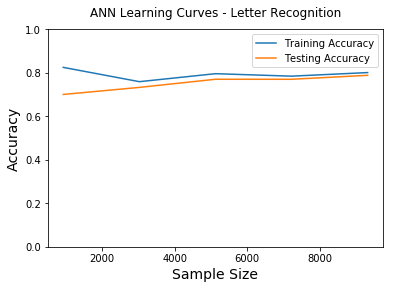

In [22]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('ANN Learning Curves - Letter Recognition', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)
plt.savefig("Letters_ANN_LC.png")

In [23]:
y_pred=RSann.predict(X_test)

In [24]:
accuracy_score(y_pred,y_test)

0.79533333333333334

In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=44
                                                                                        )),X=X_train,y=y_train, param_name='n_estimators',
                                             param_range=range(1,20),cv=5)

In [32]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

In [37]:
train_scores_mean

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

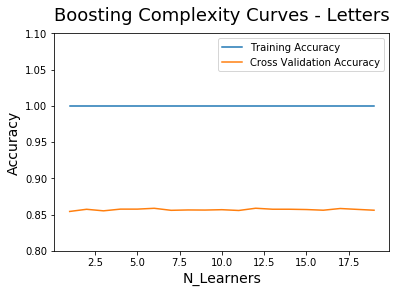

In [35]:
plt.plot(range(1,20),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,20),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('N_Learners', fontsize = 14)
plt.title('Boosting Complexity Curves - Letters', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.8,1.1)

plt.savefig("Letters_BOOST_VC1.png",bbox_inches="tight")

In [38]:
GSboost = GridSearchCV(estimator=AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=44
                                                                                        )), cv=5, param_grid ={'n_estimators':range(1,20)})

In [39]:
GSboost.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=44,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [40]:
GSboost.best_params_

{'n_estimators': 4}

In [42]:
y_pred=GSboost.predict(X_test)

In [43]:
accuracy_score(y_pred,y_test)

0.86650000000000005